In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

## DATAFRAMES POR INSTANCIA

In [34]:
# Leer los datos del archivo csv en el archivo de la carpeta output y guardarlos en un dataframe
df = pd.read_csv('../output/results.csv')
df

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Swap+Relocate(Bin Packing)_free,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free
0,a05100,5,100,1709,0.125292,0,3206,0.368792,0,1700,...,0,1700,3.73521,0,1698,36.6090,0,2348,637,0
1,a20100,20,100,1170,0.074542,0,2972,0.309958,0,1168,...,0,1167,1.44117,0,1161,38.7935,0,2570,1321,0
2,a10100,10,100,1390,0.050917,0,2954,0.158334,0,1367,...,0,1365,1.91742,0,1363,26.0193,0,2534,943,0
3,a05200,5,200,3259,0.080458,0,6075,0.189834,0,3238,...,0,3238,5.91400,0,3235,136.2860,0,5021,1792,0
4,a20200,20,200,2371,0.147458,0,5855,0.601167,0,2353,...,0,2353,7.28275,0,2345,245.2690,0,4738,5790,0
5,a10200,10,200,2670,0.102417,0,6183,0.317084,0,2632,...,0,2628,15.04920,0,2629,193.9880,0,4913,4189,0
6,b10200,10,200,8255,0.093125,42,6031,0.316042,0,7788,...,0,6779,79.38680,33,3007,164.9340,0,5824,1975,22
7,b20200,20,200,3628,0.157250,7,5860,0.623792,0,3335,...,0,2439,60.82380,0,2437,242.2750,0,3231,2399,2
8,b05200,5,200,8050,0.072292,40,6059,0.202333,0,7487,...,0,7444,74.99020,37,3640,125.9310,0,6987,1753,31
9,b10100,10,100,2115,0.050917,4,2980,0.167500,0,1952,...,0,1500,7.61942,0,1439,31.4977,0,1717,872,0


In [35]:
# column name contains the word cost
heuristics = df.columns[df.columns.str.contains('cost')].map(lambda x: x.split('_')[0]).unique()
heuristics

Index(['Greedy', 'Binpacking', 'Swap(Greedy)', 'Swap(Bin Packing)',
       'Relocate(Greedy)', 'Relocate(Bin Packing)', 'Swap+Relocate(Greedy)',
       'Swap+Relocate(Bin Packing)', 'Relocate+Swap(Greedy)',
       'Relocate+Swap(Bin Packing)', 'Meta'],
      dtype='object')

In [36]:
df["InstanceGroup"] = df["Filename"].str[0]
df

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
0,a05100,5,100,1709,0.125292,0,3206,0.368792,0,1700,...,1700,3.73521,0,1698,36.6090,0,2348,637,0,a
1,a20100,20,100,1170,0.074542,0,2972,0.309958,0,1168,...,1167,1.44117,0,1161,38.7935,0,2570,1321,0,a
2,a10100,10,100,1390,0.050917,0,2954,0.158334,0,1367,...,1365,1.91742,0,1363,26.0193,0,2534,943,0,a
3,a05200,5,200,3259,0.080458,0,6075,0.189834,0,3238,...,3238,5.91400,0,3235,136.2860,0,5021,1792,0,a
4,a20200,20,200,2371,0.147458,0,5855,0.601167,0,2353,...,2353,7.28275,0,2345,245.2690,0,4738,5790,0,a
5,a10200,10,200,2670,0.102417,0,6183,0.317084,0,2632,...,2628,15.04920,0,2629,193.9880,0,4913,4189,0,a
6,b10200,10,200,8255,0.093125,42,6031,0.316042,0,7788,...,6779,79.38680,33,3007,164.9340,0,5824,1975,22,b
7,b20200,20,200,3628,0.157250,7,5860,0.623792,0,3335,...,2439,60.82380,0,2437,242.2750,0,3231,2399,2,b
8,b05200,5,200,8050,0.072292,40,6059,0.202333,0,7487,...,7444,74.99020,37,3640,125.9310,0,6987,1753,31,b
9,b10100,10,100,2115,0.050917,4,2980,0.167500,0,1952,...,1500,7.61942,0,1439,31.4977,0,1717,872,0,b


In [37]:
# Separo las instancias
a_instance = df[df["InstanceGroup"] == "a"]
b_instance = df[df["InstanceGroup"] == "b"]
e_instance = df[df["InstanceGroup"] == "e"]
real_instance = df[df["InstanceGroup"] == "r"]


In [38]:
instances = df["InstanceGroup"].unique()

## Costo de cada instancia

In [39]:
# COSTO DE CADA INSTANCIA
costs = [df[df["InstanceGroup"] == i] for i in instances]

#if column contains "time" or "free", filter it

for cost in costs:
    cost = cost.drop(cost.columns[cost.columns.str.contains('time')], axis=1, inplace=True)

for cost in costs:
    cost = cost.drop(cost.columns[cost.columns.str.contains('free')], axis=1, inplace=True)

costs[0]

,Filename,Depositos,Vendedores,Greedy_cost,Binpacking_cost,Swap(Greedy)_cost,Swap(Bin Packing)_cost,Relocate(Greedy)_cost,Relocate(Bin Packing)_cost,Swap+Relocate(Greedy)_cost,Swap+Relocate(Bin Packing)_cost,Relocate+Swap(Greedy)_cost,Relocate+Swap(Bin Packing)_cost,Meta_cost,InstanceGroup
0,a05100,5,100,1709,3206,1700,1712,1709,1719,1700,1699,1700,1698,2348,a
1,a20100,20,100,1170,2972,1168,1245,1170,1165,1168,1163,1167,1161,2570,a
2,a10100,10,100,1390,2954,1367,1395,1390,1369,1367,1369,1365,1363,2534,a
3,a05200,5,200,3259,6075,3238,3258,3259,3236,3238,3235,3238,3235,5021,a
4,a20200,20,200,2371,5855,2353,2423,2371,2357,2353,2354,2353,2345,4738,a
5,a10200,10,200,2670,6183,2632,2677,2670,2636,2632,2633,2628,2629,4913,a


## Tiempo de cada instancia

In [40]:
# COSTO DE CADA INSTANCIA
times = [df[df["InstanceGroup"] == i] for i in instances]

#if column contains "cost" or "free", filter it

for time in times:
    time = time.drop(time.columns[time.columns.str.contains('cost')], axis=1, inplace=True)

for time in times:
    time = time.drop(time.columns[time.columns.str.contains('free')], axis=1, inplace=True)

times[0]

,Filename,Depositos,Vendedores,Greedy_time,Binpacking_time,Swap(Greedy)_time,Swap(Bin Packing)_time,Relocate(Greedy)_time,Relocate(Bin Packing)_time,Swap+Relocate(Greedy)_time,Swap+Relocate(Bin Packing)_time,Relocate+Swap(Greedy)_time,Relocate+Swap(Bin Packing)_time,Meta_time,InstanceGroup
0,a05100,5,100,0.125292,0.368792,3.67896,36.3424,0.264083,4.98304,1.59033,7.03517,3.73521,36.6090,637,a
1,a20100,20,100,0.074542,0.309958,1.17204,34.6973,0.206625,15.93470,1.36125,16.75970,1.44117,38.7935,1321,a
2,a10100,10,100,0.050917,0.158334,1.74425,25.2252,0.118459,7.28850,1.85883,7.64700,1.91742,26.0193,943,a
3,a05200,5,200,0.080458,0.189834,5.83462,135.6930,0.157499,12.19400,5.93587,14.71380,5.91400,136.2860,1792,a
4,a20200,20,200,0.147458,0.601167,7.04383,237.0990,0.392708,58.61140,7.32383,62.74570,7.28275,245.2690,5790,a
5,a10200,10,200,0.102417,0.317084,14.60730,191.5960,0.233834,29.05380,15.35910,33.14720,15.04920,193.9880,4189,a


## Vendedores sin asignar de cada instancia

In [41]:
# Libres
frees = [df[df["InstanceGroup"] == i] for i in instances]

#if column contains "time" or "cost", filter it

for free in frees:
    free = free.drop(free.columns[free.columns.str.contains('cost')], axis=1, inplace=True)

for free in frees:
    free = free.drop(free.columns[free.columns.str.contains('time')], axis=1, inplace=True)

frees[0]

,Filename,Depositos,Vendedores,Greedy_free,Binpacking_free,Swap(Greedy)_free,Swap(Bin Packing)_free,Relocate(Greedy)_free,Relocate(Bin Packing)_free,Swap+Relocate(Greedy)_free,Swap+Relocate(Bin Packing)_free,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_free,Meta_free,InstanceGroup
0,a05100,5,100,0,0,0,0,0,0,0,0,0,0,0,a
1,a20100,20,100,0,0,0,0,0,0,0,0,0,0,0,a
2,a10100,10,100,0,0,0,0,0,0,0,0,0,0,0,a
3,a05200,5,200,0,0,0,0,0,0,0,0,0,0,0,a
4,a20200,20,200,0,0,0,0,0,0,0,0,0,0,0,a
5,a10200,10,200,0,0,0,0,0,0,0,0,0,0,0,a


In [42]:
# Print de las instancias
display(Markdown('## Instancia A'))
display(a_instance)

display(Markdown('## Instancia B'))
display(b_instance)

display(Markdown('## Instancia E'))
display(e_instance)

display(Markdown('## Instancia Real'))
display(real_instance)

## Instancia A

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
0,a05100,5,100,1709,0.125292,0,3206,0.368792,0,1700,...,1700,3.73521,0,1698,36.6090,0,2348,637,0,a
1,a20100,20,100,1170,0.074542,0,2972,0.309958,0,1168,...,1167,1.44117,0,1161,38.7935,0,2570,1321,0,a
2,a10100,10,100,1390,0.050917,0,2954,0.158334,0,1367,...,1365,1.91742,0,1363,26.0193,0,2534,943,0,a
3,a05200,5,200,3259,0.080458,0,6075,0.189834,0,3238,...,3238,5.91400,0,3235,136.2860,0,5021,1792,0,a
4,a20200,20,200,2371,0.147458,0,5855,0.601167,0,2353,...,2353,7.28275,0,2345,245.2690,0,4738,5790,0,a
5,a10200,10,200,2670,0.102417,0,6183,0.317084,0,2632,...,2628,15.04920,0,2629,193.9880,0,4913,4189,0,a


## Instancia B

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
6,b10200,10,200,8255,0.093125,42,6031,0.316042,0,7788,...,6779,79.38680,33,3007,164.9340,0,5824,1975,22,b
7,b20200,20,200,3628,0.157250,7,5860,0.623792,0,3335,...,2439,60.82380,0,2437,242.2750,0,3231,2399,2,b
8,b05200,5,200,8050,0.072292,40,6059,0.202333,0,7487,...,7444,74.99020,37,3640,125.9310,0,6987,1753,31,b
9,b10100,10,100,2115,0.050917,4,2980,0.167500,0,1952,...,1500,7.61942,0,1439,31.4977,0,1717,872,0,b
10,b20100,20,100,1660,0.081667,2,3006,0.318417,0,1512,...,1396,6.35067,1,1221,35.9576,0,1649,935,1,b
11,b05100,5,100,4972,0.033291,27,2979,0.095917,0,4677,...,4255,8.43604,24,1985,11.4043,0,4035,524,21,b


## Instancia E

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup


## Instancia Real

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup


## GRAFICOS

### 1. COSTOS

In [43]:
costs[0]

,Filename,Depositos,Vendedores,Greedy_cost,Binpacking_cost,Swap(Greedy)_cost,Swap(Bin Packing)_cost,Relocate(Greedy)_cost,Relocate(Bin Packing)_cost,Swap+Relocate(Greedy)_cost,Swap+Relocate(Bin Packing)_cost,Relocate+Swap(Greedy)_cost,Relocate+Swap(Bin Packing)_cost,Meta_cost,InstanceGroup
0,a05100,5,100,1709,3206,1700,1712,1709,1719,1700,1699,1700,1698,2348,a
1,a20100,20,100,1170,2972,1168,1245,1170,1165,1168,1163,1167,1161,2570,a
2,a10100,10,100,1390,2954,1367,1395,1390,1369,1367,1369,1365,1363,2534,a
3,a05200,5,200,3259,6075,3238,3258,3259,3236,3238,3235,3238,3235,5021,a
4,a20200,20,200,2371,5855,2353,2423,2371,2357,2353,2354,2353,2345,4738,a
5,a10200,10,200,2670,6183,2632,2677,2670,2636,2632,2633,2628,2629,4913,a


,Filename,Depositos,Vendedores,Greedy_cost,Binpacking_cost,Swap(Greedy)_cost,Swap(Bin Packing)_cost,Relocate(Greedy)_cost,Relocate(Bin Packing)_cost,Swap+Relocate(Greedy)_cost,Swap+Relocate(Bin Packing)_cost,Relocate+Swap(Greedy)_cost,Relocate+Swap(Bin Packing)_cost,Meta_cost,InstanceGroup
0,a05100,5,100,1709,3206,1700,1712,1709,1719,1700,1699,1700,1698,2348,a


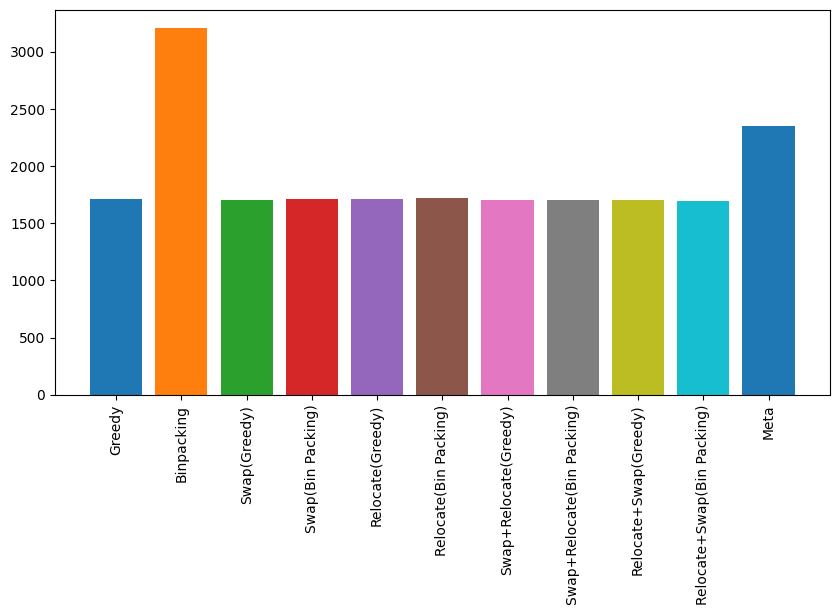

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sub_df = costs[0].head(1)
display(sub_df)
for h in heuristics:
    ax.bar(h, sub_df[h+"_cost"], label=h)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

# ax.set_ylim(0, 1000)



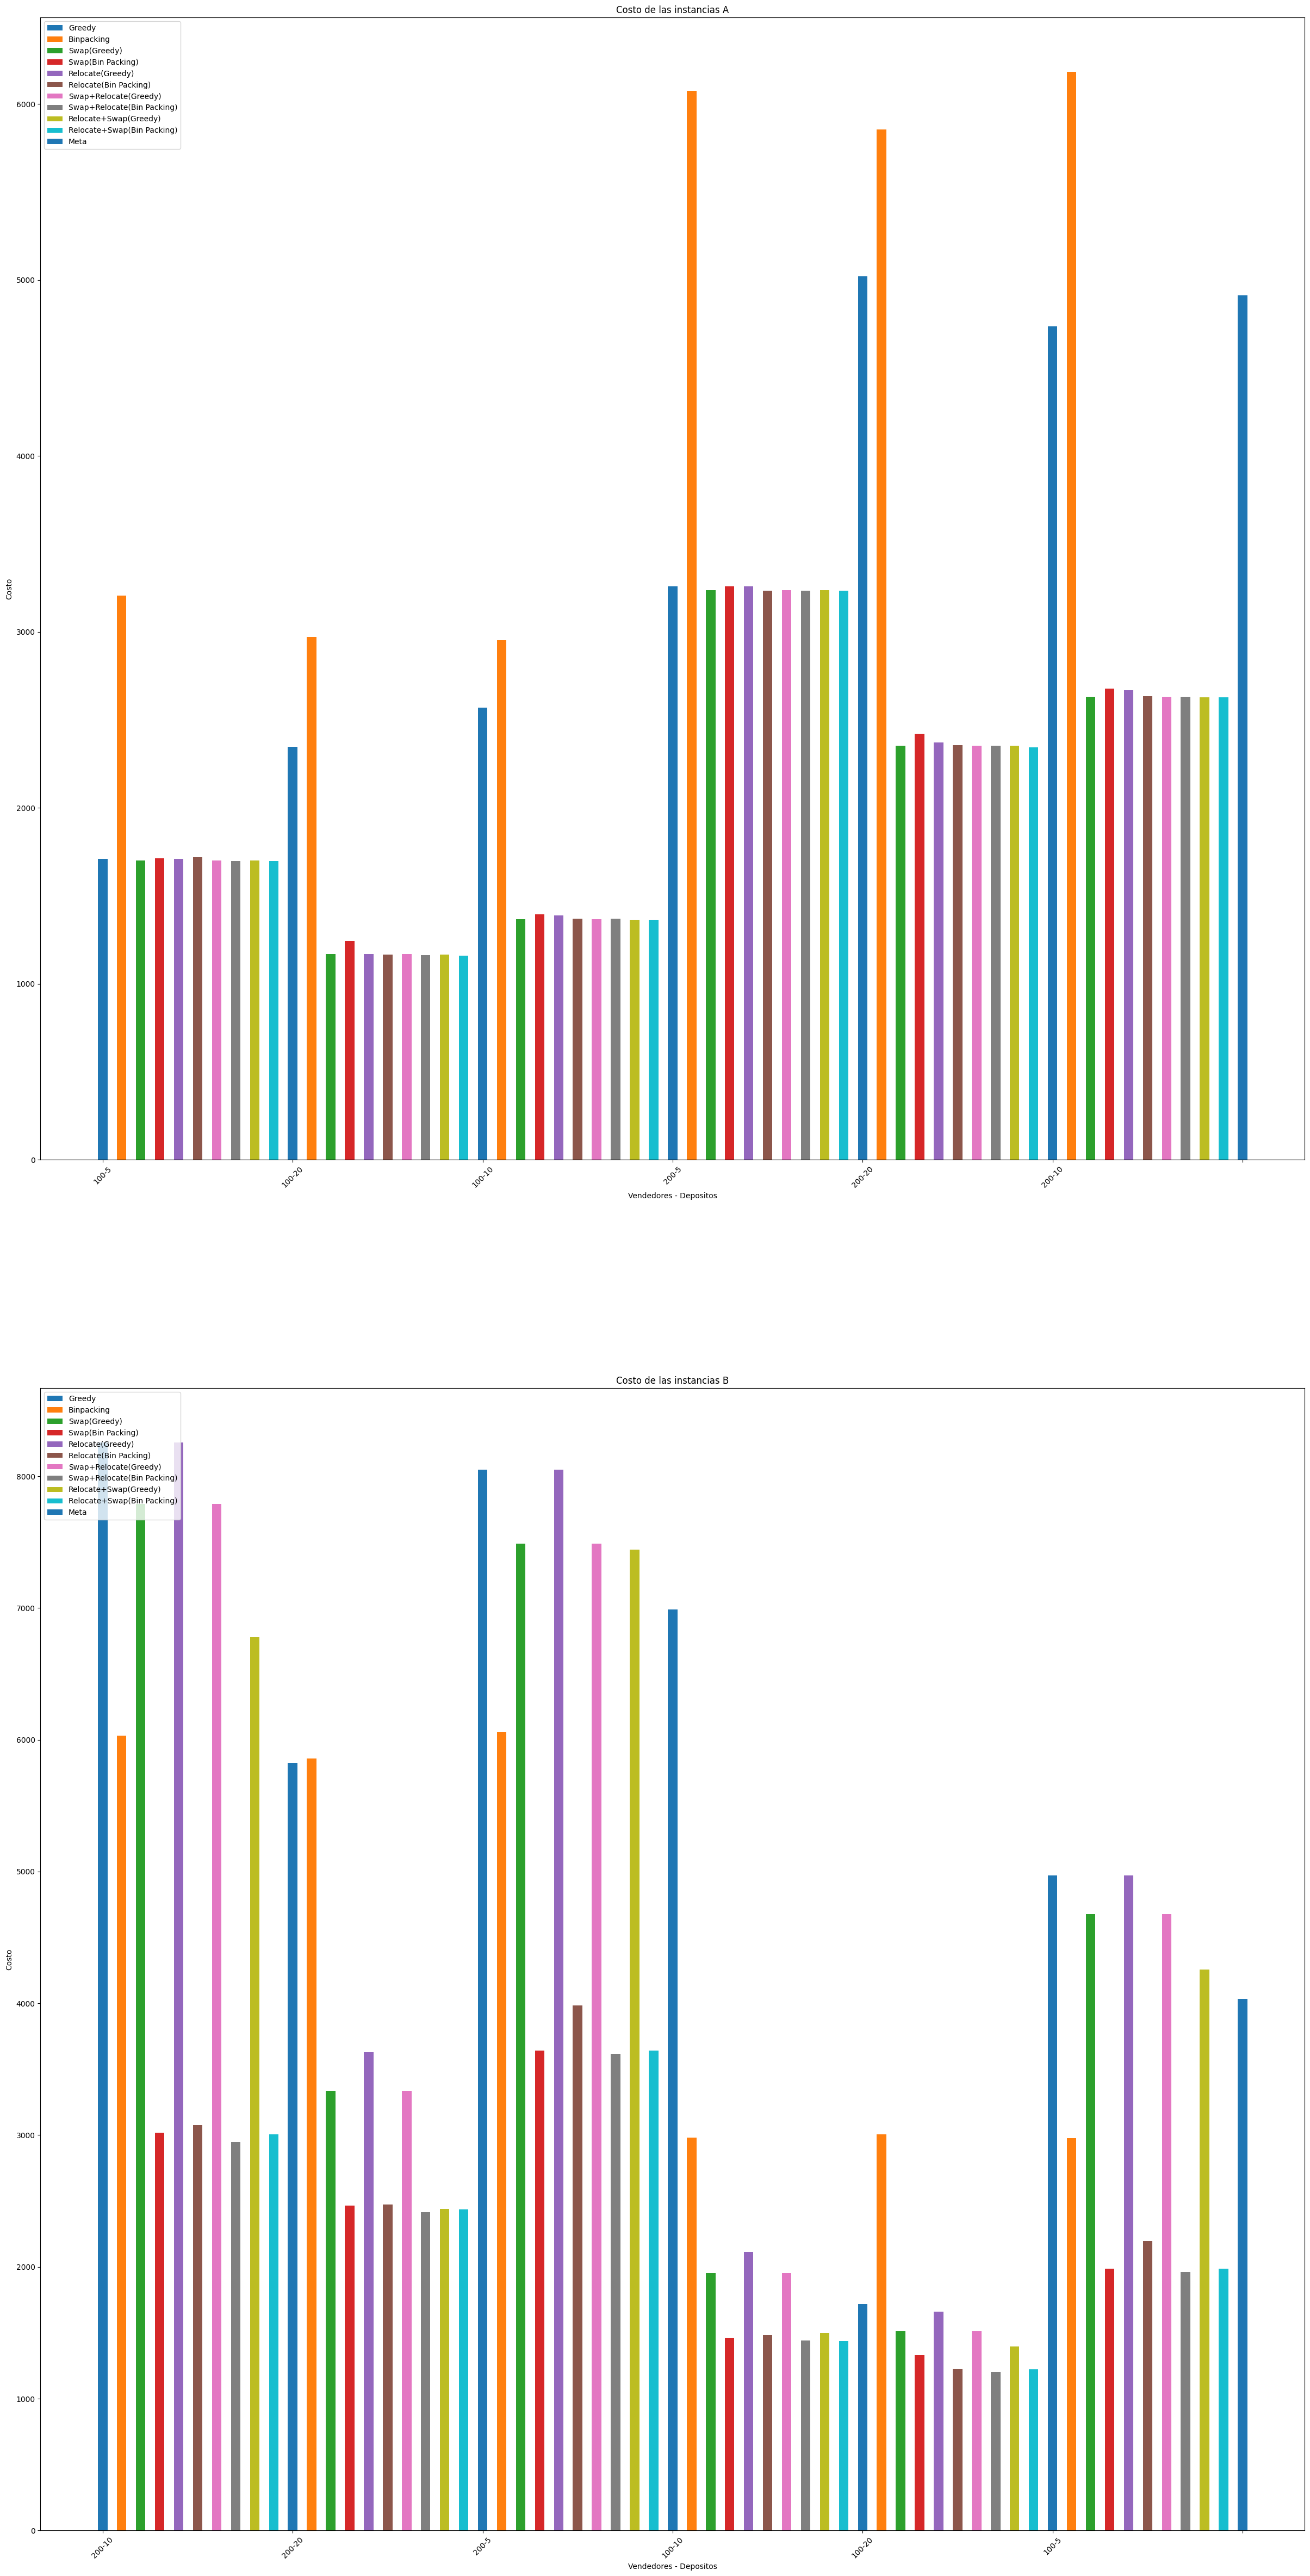

In [45]:
fig, axs = plt.subplots(len(costs), 1, figsize=(30, 60))

for i, cost in enumerate(costs):

    cost['Vendedores-Depositos'] = cost['Vendedores'].astype(str) + '-' + cost['Depositos'].astype(str)

    axs[i].set_title('Costo de las instancias ' + cost['InstanceGroup'].unique()[0].upper())
    axs[i].set_xlabel('Vendedores - Depositos')
    axs[i].set_ylabel('Costo')

    for h in heuristics:
        axs[i].bar(np.arange(len(cost['Vendedores-Depositos'])) + (heuristics == h).argmax() * 0.1, cost[h+"_cost"], width=0.05, label=h)

    axs[i].legend()

    # add division between 'Vendedores-Depositos'

    axs[i].set_xticklabels([""] + list(cost['Vendedores-Depositos']))



for i, ax in enumerate(axs):
    ax.set_xticklabels([""] + list(costs[i]['Vendedores-Depositos']))
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper left')

    # leave some space between subplots



### 2. TIEMPOS

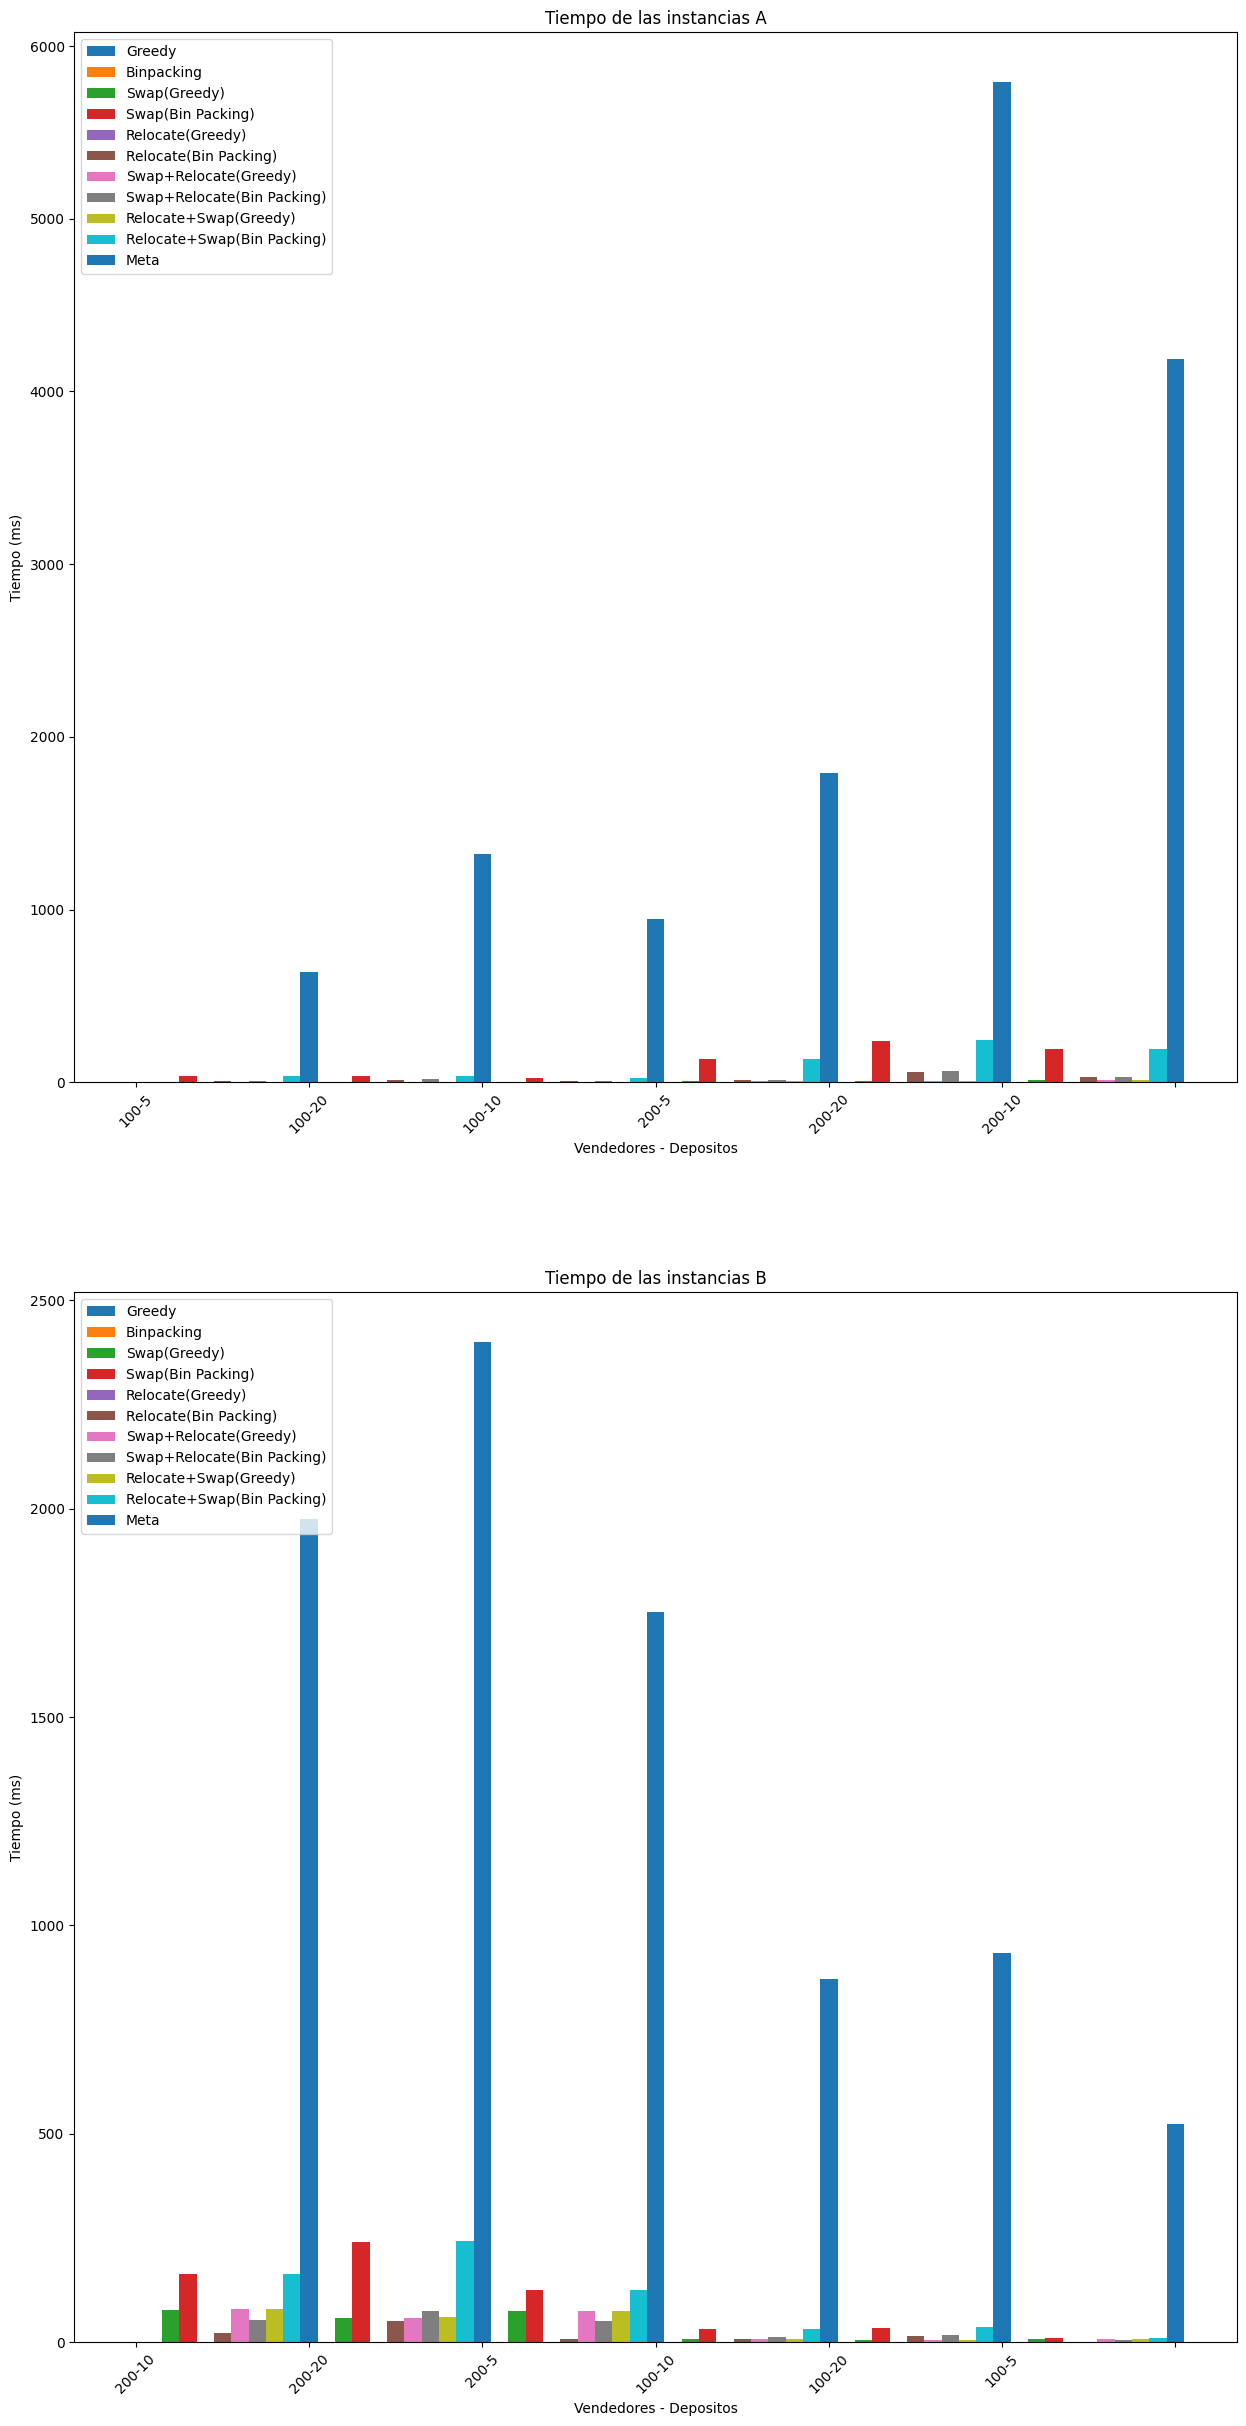

In [46]:
fig, axs = plt.subplots(len(times), 1, figsize=(15, 30))

for i, time in enumerate(times):

    time['Vendedores-Depositos'] = time['Vendedores'].astype(str) + '-' + time['Depositos'].astype(str)

    axs[i].set_title('Tiempo de las instancias ' + time['InstanceGroup'].unique()[0].upper())
    axs[i].set_xlabel('Vendedores - Depositos')
    axs[i].set_ylabel('Tiempo (ms)')

    for h in heuristics:
        # Bar plot
        axs[i].bar(np.arange(len(time['Vendedores-Depositos'])) + (heuristics == h).argmax() * 0.1, time[h+"_time"], width=0.1, label=h)

    axs[i].legend()

for i, ax in enumerate(axs):
    ax.set_xticklabels([""] + list(times[i]['Vendedores-Depositos']))
    # rotate x tick labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper left')


## Cantidad de vendedores sin asignar

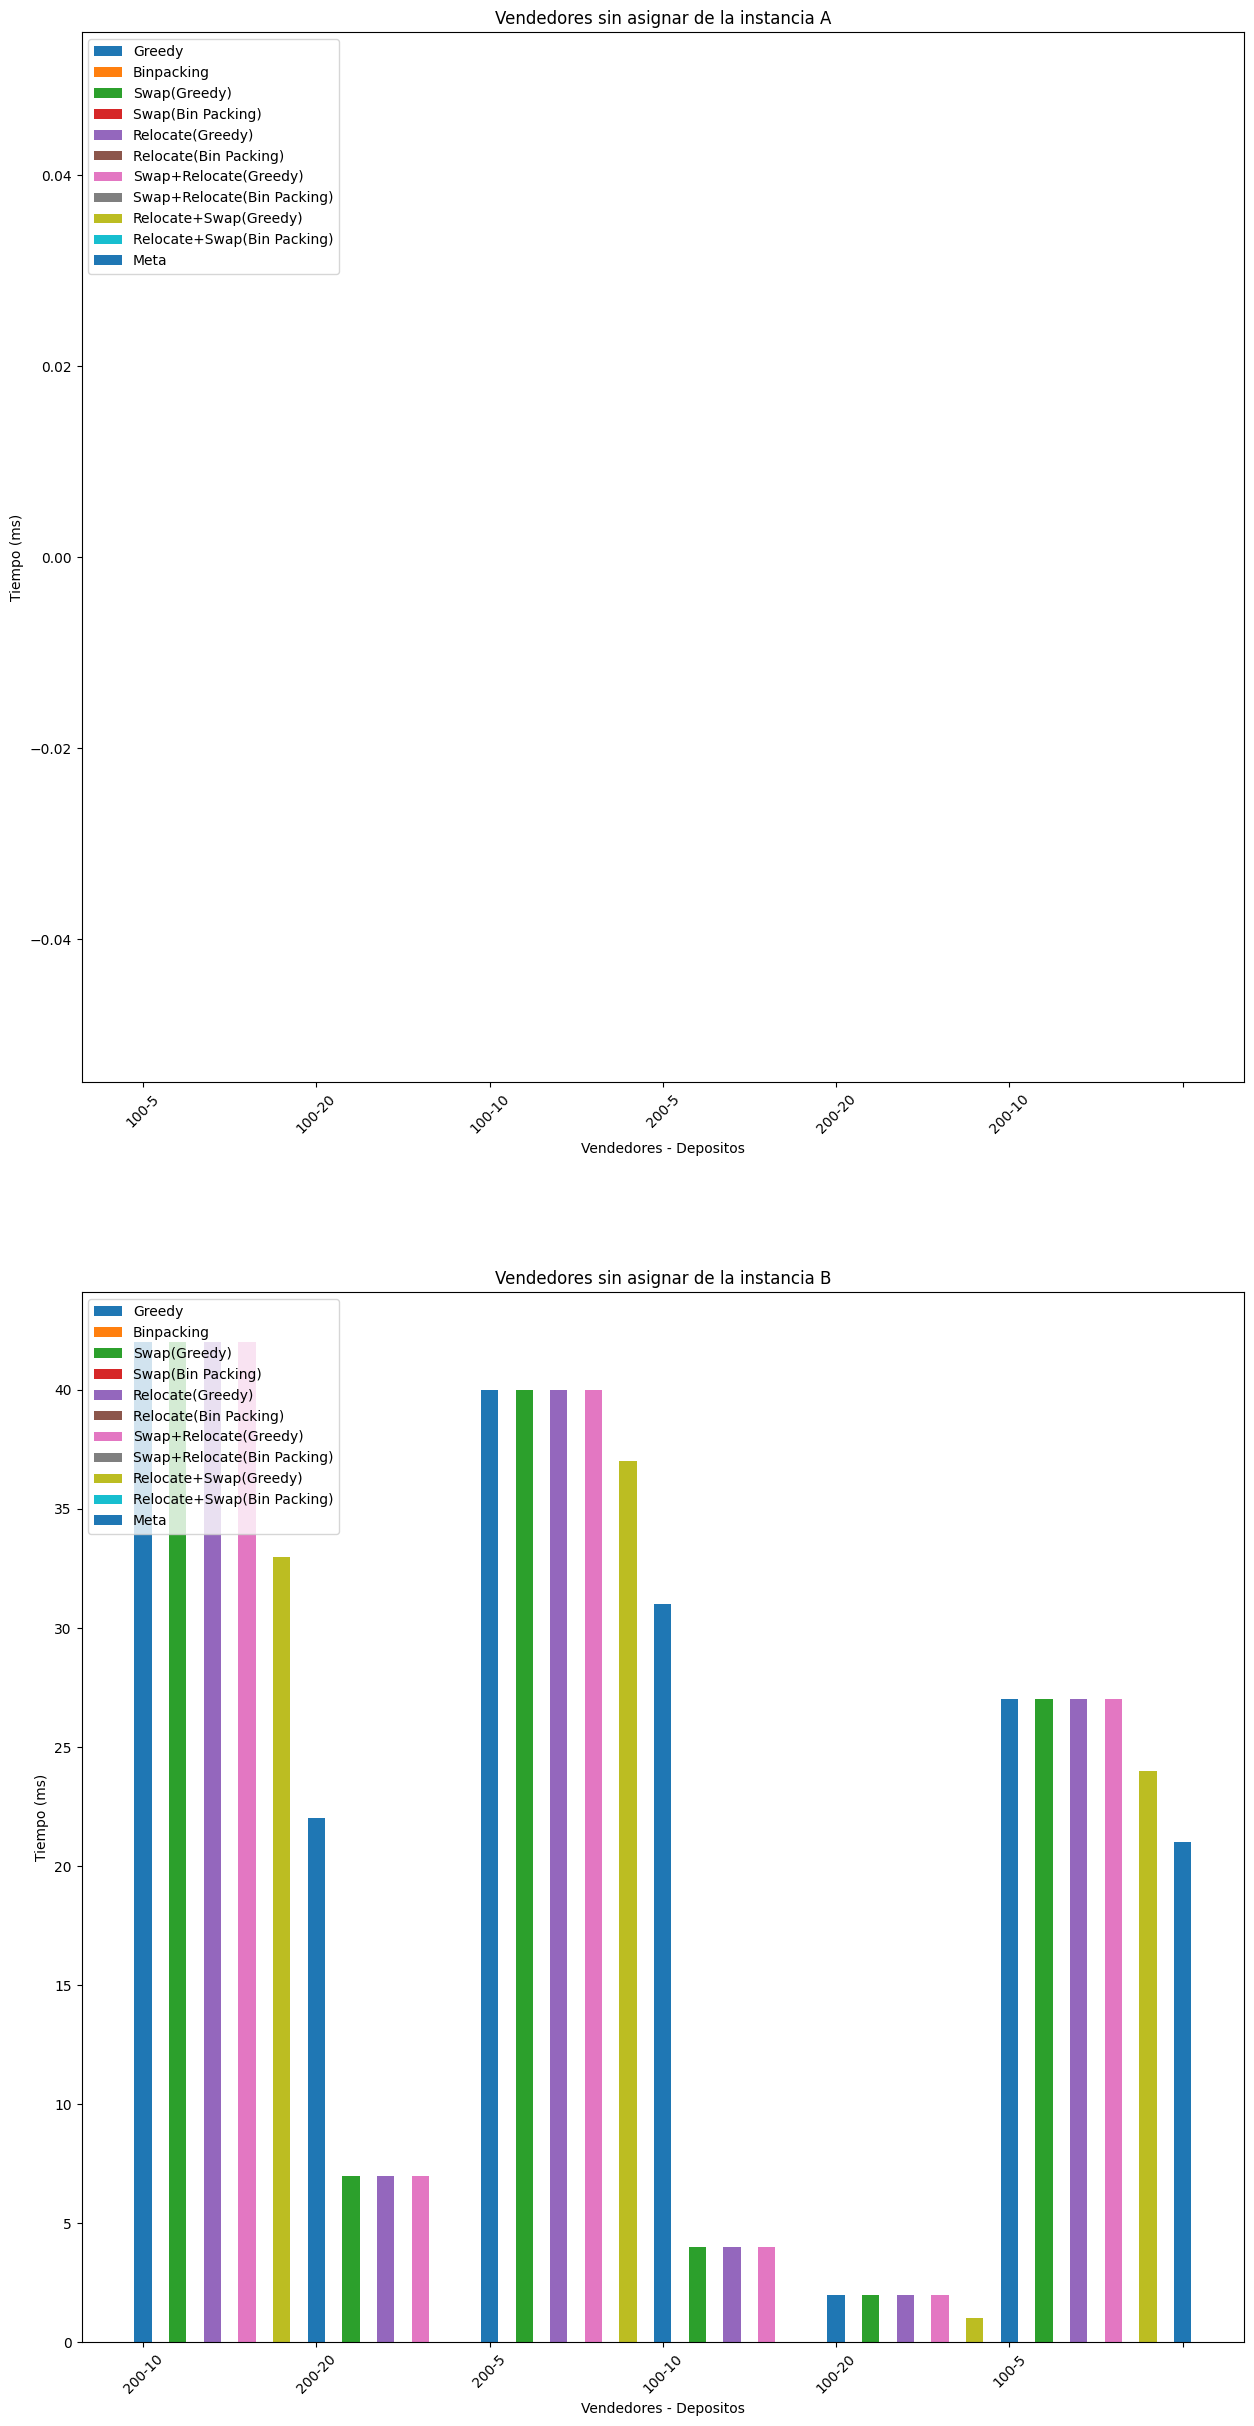

In [47]:
fig, axs = plt.subplots(len(frees), 1, figsize=(15, 30))

for i, free in enumerate(frees):

    free['Vendedores-Depositos'] = free['Vendedores'].astype(str) + '-' + free['Depositos'].astype(str)

    axs[i].set_title('Vendedores sin asignar de la instancia ' + free['InstanceGroup'].unique()[0].upper())
    axs[i].set_xlabel('Vendedores - Depositos')
    axs[i].set_ylabel('Tiempo (ms)')

    for h in heuristics:
        # Bar plot
        axs[i].bar(np.arange(len(free['Vendedores-Depositos'])) + (heuristics == h).argmax() * 0.1, free[h+"_free"], width=0.1, label=h)

    axs[i].legend()

for i, ax in enumerate(axs):
    ax.set_xticklabels([""] + list(frees[i]['Vendedores-Depositos']))
    # rotate x tick labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper left')


### 3. INSTANCIA REAL

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (0,) and arg 1 with shape (0, 37).

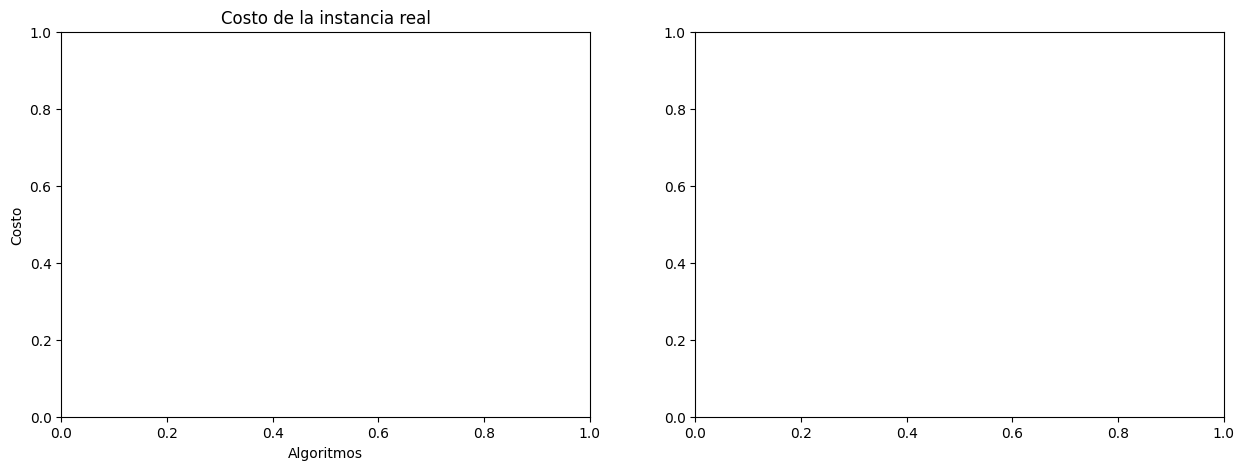

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].set_title('Costo de la instancia real')
axs[0].set_xlabel('Algoritmos')
axs[0].set_ylabel('Costo')

axs[0].bar(np.arange(len(real_instance[3::2])), real_instance[3::2], align='center', alpha=0.5, width=1)
# axs[0].set_xticklabels([""] + [x[:-5] for x in real_instance.index[3::2]])
axs[0].set_xticklabels([""])

axs[1].set_title('Tiempo de la instancia real')
axs[1].set_xlabel('Algoritmos')
axs[1].set_ylabel('Tiempo (ms)')

axs[1].bar(np.arange(len(real_instance[4::2])), real_instance[4::2], align='center', alpha=0.5, width=1)
# axs[1].set_xticklabels([""] + [x[:-5] for x in real_instance.index[4::2]])

axs[0].legend(['Vendedores: ' + str(real_instance[1]) + ' - Depositos: ' + str(real_instance[2])])
axs[1].legend(['Vendedores: ' + str(real_instance[1]) + ' - Depositos: ' + str(real_instance[2])])

for ax in axs:
    for tick in ax.get_xticklabels():
        tick.set_rotation(20)

_ = plt.show()

In [ ]:
real_instance[heuristics + '_cost']

In [ ]:
real_instance[heuristics + '_time']